export HOME=/c/Users/fireb (temporary fix)

remember to fetch from lfs
git lfs fetch --all
git lfs checkout


In [ ]:
import numpy as np 

data_array = np.load('monkeyH_PPC_raw_firing_rate.npy')
print("Shape of the data:", data_array)

Shape of the data: [[[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [20. 20. 20. ...  0.  0. 20.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0. 20. 20. ...  0. 20. 20.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0. 20. ... 60. 60.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 ...

 [[ 0.  0.  0. ... 20.  0. 20.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0. 40. 60.]
  ...
  [ 0. 20. 20. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0. 20. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0.  0. ...  0.  0.  0.]
  [ 0.  0

In [ ]:
#visualization

#[3,4,2]
#Stack 1:
#Layer 1: [🔴][🔵]
#Layer 2: [🟢][🟡]
#Layer 3: [🟠][🟣]
#Layer 4: [🟤][⚪️]

#Stack 2:
#Layer 1: [🔴][🔵]
#Layer 2: [🟢][🟡]
#Layer 3: [🟠][🟣]
#Layer 4: [🟤][⚪️]

#Stack 3:
#Layer 1: [🔴][🔵]
#Layer 2: [🟢][🟡]
#Layer 3: [🟠][🟣]
#Layer 4: [🟤][⚪️]

#[3,8]
#Stack 1: [🔴][🔵][🟢][🟡][🟠][🟣][🟤][⚪️]

#Stack 2: [🔴][🔵][🟢][🟡][🟠][🟣][🟤][⚪️]

#Stack 3: [🔴][🔵][🟢][🟡][🟠][🟣][🟤][⚪️]


In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
#STANDARDIZATION
# Reshape the data such that each row is a trial and each column is a feature
reshaped_data = data_array.reshape(data_array.shape[0], -1)

# Step 1: Standardize the data (center and scale to unit variance)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(reshaped_data)



In [25]:
#PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_data)

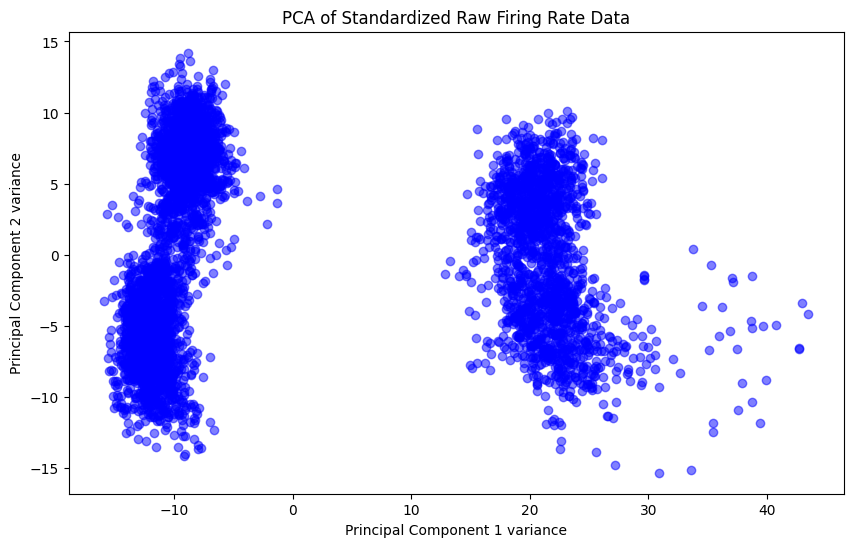

In [26]:
#PLOTTING DATA 

plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, color="b")
plt.xlabel('Principal Component 1 variance')
plt.ylabel('Principal Component 2 variance')
plt.title('PCA of Standardized Raw Firing Rate Data')
plt.show()

In [27]:
#LABEL ANALYSIS 

import pickle 

label_file = 'monkeyH_PPC.pkl'
#opening label file and assigning variables
with open(label_file, 'rb') as file:
    labels = pickle.load(file)

type(labels), len(labels)

(pandas.core.frame.DataFrame, 5329)

In [28]:
labels.head()

,Spikes,PPC_Spikes,TrialID,TrialIDcount,ItemID,duration,StimID,Block,sesID
0,[],"[[], [], [0.3168333333333333, 0.32533333333333...",716.0,1.0,1.0,0.0330,9.0,0.0,0.0
1,[],"[[], [], [0.1123666666666665, 0.66999999999999...",1716.0,1.0,1.0,0.0340,1.0,0.0,0.0
2,[],"[[], [], [0.10706666666666642, 0.1426333333333...",1733.0,0.0,1.0,0.0340,1.0,0.0,0.0
3,[],"[[], [], [-0.019199999999999662, 0.11266666666...",1817.0,0.0,1.0,0.0340,17.0,0.0,0.0
4,[],"[[0.19960000000000022], [], [-0.00096666666666...",100.0,1.0,1.0,0.0345,15.0,0.0,0.0


In [11]:
from sklearn.decomposition import PCA

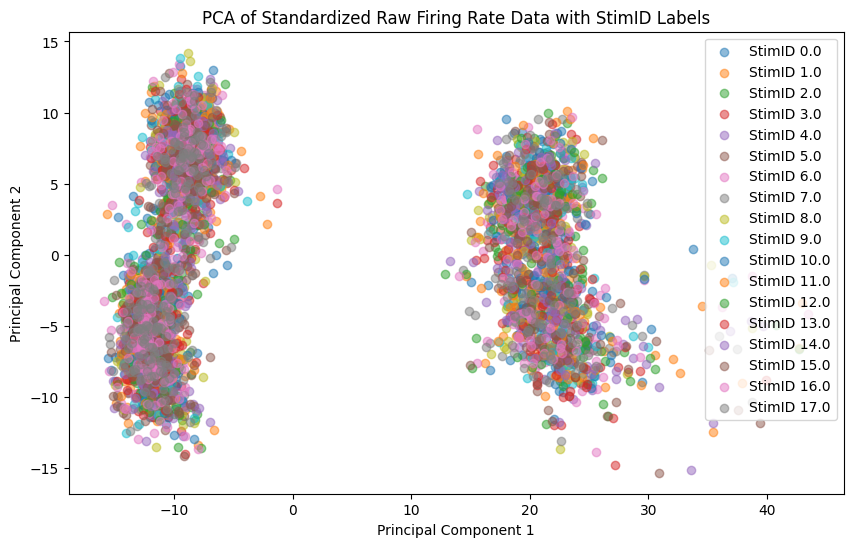

In [29]:
#using stim id as labels 

trial_labels = labels['StimID'].values

# Plot the PCA results with color labels based on StimID
plt.figure(figsize=(10, 6))

# Assuming StimID values are categorical and we have different values to represent different stimuli
unique_labels = np.unique(trial_labels)
for label in unique_labels:
    plt.scatter(pca_result[trial_labels == label, 0], pca_result[trial_labels == label, 1], label=f'StimID {label}', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Raw Firing Rate Data with StimID Labels')
plt.legend()
plt.show()

In [14]:
#Stim ID lables arent dominant factor

# what can we do next? Alternative label anaylsis using other label; different clustering analysis

#Clustering analysis, Supervised Classification Analysis 

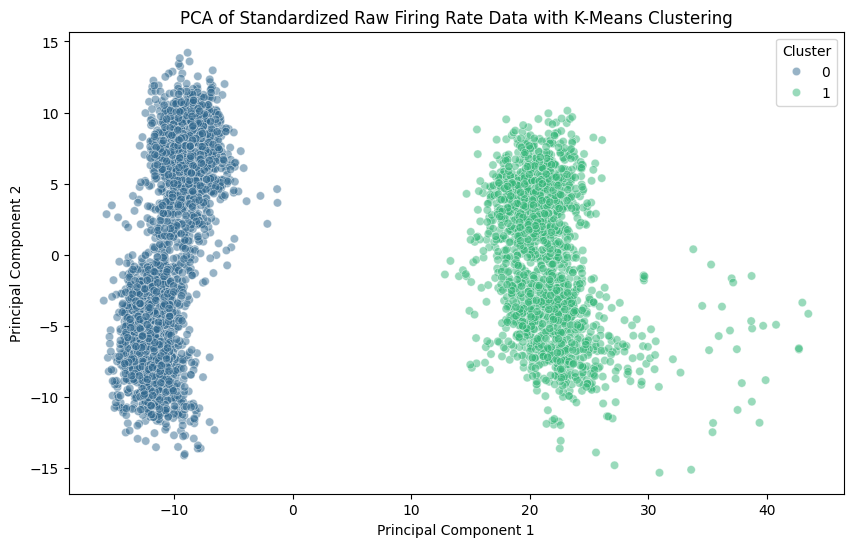

(Cluster    0    1
 StimID           
 0.0      201   96
 1.0      199   95
 2.0      200  108
 3.0      215   95
 4.0      202   83
 5.0      183   98
 6.0      181  104
 7.0      226  101
 8.0      218   94
 9.0      194   81
 10.0     204  106
 11.0     194   96
 12.0     196   95
 13.0     209   93
 14.0     184  103
 15.0     204   99
 16.0     180   96
 17.0     197   99,
 Cluster     0     1
 Block              
 0.0        11     0
 1.0      1804  1742
 2.0      1772     0)

In [31]:
from sklearn.cluster import KMeans
import seaborn as sns

# Step 1: Apply k-means clustering on the PCA-reduced data
# We'll use 2 clusters to see if there's a separation similar to what we saw in PCA
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Step 2: Add clustering results to the labels DataFrame for comparison
labels['Cluster'] = clusters

# Step 3: Plot the PCA results colored by cluster assignment
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Raw Firing Rate Data with K-Means Clustering')
plt.legend(title='Cluster')
plt.show()

# Step 4: Analyze how well clusters correspond with StimID and Block labels
# Cross-tabulation of clusters with StimID and Block
stimid_cluster_ct = pd.crosstab(labels['StimID'], labels['Cluster'])
block_cluster_ct = pd.crosstab(labels['Block'], labels['Cluster'])

# Display cross-tabulation results
stimid_cluster_ct, block_cluster_ct

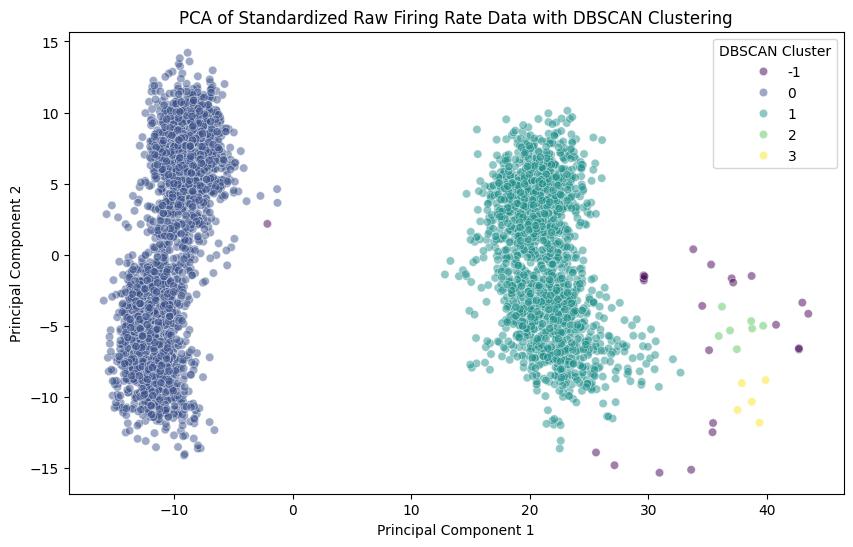

Cross-tabulation of StimID vs DBSCAN Cluster:
DBSCAN_Cluster  -1    0    1   2   3
StimID                              
0.0              1  201   95   0   0
1.0              3  198   92   0   1
2.0              2  200  106   0   0
3.0              1  215   94   0   0
4.0              0  202   82   1   0
5.0              1  183   96   0   1
6.0              2  181  101   1   0
7.0              1  226   98   1   1
8.0              2  218   91   1   0
9.0              1  194   80   0   0
10.0             2  204  104   0   0
11.0             2  194   94   0   0
12.0             0  196   95   0   0
13.0             0  209   92   0   1
14.0             2  184   99   2   0
15.0             1  204   97   0   1
16.0             2  180   94   0   0
17.0             0  197   98   1   0

Cross-tabulation of Block vs DBSCAN Cluster:
DBSCAN_Cluster  -1     0     1   2   3
Block                                 
0.0              0    11     0   0   0
1.0             22  1804  1708   7   5
2.0         

In [34]:

import pickle
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data again
file_path = 'monkeyH_PPC_raw_firing_rate.npy'
firing_rate_data = np.load(file_path)

# Load the labels DataFrame
label_file_path = 'monkeyH_PPC.pkl'
with open(label_file_path, 'rb') as file:
    labels = pickle.load(file)

# Reshape the data for PCA
reshaped_data = firing_rate_data.reshape(firing_rate_data.shape[0], -1)

# Step 1: Standardize the data (center and scale to unit variance)
scaler = StandardScaler()
standardized_data = scaler.fit_transform(reshaped_data)

# Step 2: Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(standardized_data)

# Step 3: Apply DBSCAN clustering on the PCA-reduced data
# DBSCAN parameters (epsilon and min_samples) may need tuning for optimal results
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_clusters = dbscan.fit_predict(pca_result)

# Step 4: Add DBSCAN clustering results to the labels DataFrame for comparison
labels['DBSCAN_Cluster'] = dbscan_clusters

# Step 5: Plot the PCA results colored by DBSCAN cluster assignment
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=dbscan_clusters, palette='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Standardized Raw Firing Rate Data with DBSCAN Clustering')
plt.legend(title='DBSCAN Cluster')
plt.show()

# Step 6: Cross-tabulation of DBSCAN clusters with StimID and Block labels
# This will help us see if there is a relationship between the clusters found by DBSCAN and the known labels

# Cross-tabulate DBSCAN Cluster with StimID
dbscan_stimid_cluster_ct = pd.crosstab(labels['StimID'], labels['DBSCAN_Cluster'])

# Cross-tabulate DBSCAN Cluster with Block
dbscan_block_cluster_ct = pd.crosstab(labels['Block'], labels['DBSCAN_Cluster'])

# Display cross-tabulation results for analysis
print("Cross-tabulation of StimID vs DBSCAN Cluster:")
print(dbscan_stimid_cluster_ct)

print("\nCross-tabulation of Block vs DBSCAN Cluster:")
print(dbscan_block_cluster_ct)
